#**Week 2: Convolutional** **nets**

#Part I: learning about convolutions and rescaling operations

**1.1. install mxNet to start the day and import useful libraries**

In [1]:
#first, let's import some useful libraries
import mxnet as mx
from mxnet import autograd, np, npx
mx.npx.set_np()
from mxnet.gluon import nn
np.__path__

['C:\\Users\\coren\\Anaconda3\\lib\\site-packages\\mxnet\\numpy']

**1.2. Implementing cross correlation operator (exercise in the slides)**

In [2]:
#Exercise in the slides. Also chap. 6.2 in the book.

I = np.array([[3,1,4,3],[3,2,3,1],[4,3,6,4],[3,3,1,7]])
print('Image array')
print(I)
W1 = np.array([[1,-1,2],[3,1,4],[5,-2,9]])
print('Filter W1')
print(W1)
W2 = np.array([[1,1,1],[1,1,1],[1,1,1]])
print('Filter W2')
print(W2)



  

Image array
[[3. 1. 4. 3.]
 [3. 2. 3. 1.]
 [4. 3. 6. 4.]
 [3. 3. 1. 7.]]
Filter W1
[[ 1. -1.  2.]
 [ 3.  1.  4.]
 [ 5. -2.  9.]]
Filter W2
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [5]:
I.shape-W1.shape

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [9]:
#function for correlations
def corr2d(Im,f):
    shape_res=Im.shape[0]-f.shape[0]+1
    result=np.zeros((shape_res,shape_res))
    for i in range(shape_res):
        for j in range(shape_res):
            result[i,j]=np.sum(Im[i:i+f.shape[0],j:j+f.shape[0]]*f)
    return(result)

print('Convolution with W1:')
print(corr2d(I,W1))
print('Convolution with W2 (matrix of ones):')
print(corr2d(I,W2))

Convolution with W1:
[[101.  55.]
 [ 64. 108.]]
Convolution with W2 (matrix of ones):
[[29. 27.]
 [28. 30.]]


**1.3. Implement the example in the book, at 6.4, using your own corr2d()**

In [14]:
#implement example 6.4 book

def multiband_conv2d(Im,f):
    lres=[]
    for i,I in enumerate(Im):
        lres.append(corr2d(I,f[i]))
    return(np.sum(np.array(lres),axis=0))
        
  # write a function that applies corr2d(im,filt) to each band of the image I (with a for loop over bands) 
  # in the example, each band gets its own filter!


II = np.array([[[0, 1, 2], [3, 4, 5], [6, 7, 8]],
              [[1, 2, 3], [4, 5, 6], [7, 8, 9]]])
WW = np.array([[[0, 1], [2, 3]], [[1, 2], [3, 4]]])
  
multiband_conv2d(II,WW)




array([[ 56.,  72.],
       [104., 120.]])

# Part II. Padding, stride, pooling

**2.1. Trying out padding and stride. Using the nn.conv2D() function**

In [15]:
#First, let's code padding manually (just to see the expected result)
# To do so,let's just add rows and columns of zeores to I
I3 = np.array([[0,0,0,0,0,0],[0,3,1,4,3,0],[0,3,2,3,1,0],[0,4,3,6,4,0],[0,3,3,1,7,0],[0,0,0,0,0,0]])
#Other solution:
I3 = np.zeros((I.shape[0] + 2, I.shape[1] + 2))
I3[1:-1,1:-1] = I
print('W1,padded:')
print(corr2d(I3,W1))
print('W2 (ones),padded:') 
print(corr2d(I3,W2))

W1,padded:
[[ 19.  64.  32.  28.]
 [ 29. 101.  55.  33.]
 [ 38.  64. 108.  15.]
 [ 17.  29.  43.  12.]]
W2 (ones),padded:
[[ 9. 16. 14. 11.]
 [16. 29. 27. 21.]
 [18. 28. 30. 22.]
 [13. 20. 24. 18.]]


In [17]:
help(nn.Conv2D)

Help on class Conv2D in module mxnet.gluon.nn.conv_layers:

class Conv2D(_Conv)
 |  Conv2D(channels, kernel_size, strides=(1, 1), padding=(0, 0), dilation=(1, 1), groups=1, layout='NCHW', activation=None, use_bias=True, weight_initializer=None, bias_initializer='zeros', in_channels=0, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  If `in_channels` is not specified, `Parameter` initialization will be
 |  deferred to the first time `forward` is called and `in_channels` will be
 |  inferred from the shape of input data.
 |  
 |  Parameters
 |  ----------
 |  channels : int
 |      The dimensionality of the output space, i.e. the number of output
 |      channels (f

In [23]:
#Padding and stride using the nn.conv2D() function (book chapter 6.3)

def comp_conv2d(conv2d, X):
  #write your own function for computing convolutions
    conv2d.initialize()
    X = X.reshape((1, 1) + X.shape)

    Y = conv2d(X)
    # Exclude the first two dimensions that do not interest us: batch and
    # channel
    return Y.reshape(Y.shape[2:])

  # 1. initialize the filter with some weights
  # 2. reshape the data in the mxnet desired format (#band,#sampleInBatch,height,width)
  # 3. perform convolution 
  # 4. return the output, re-shaped in the shape you like (rows x cols)

print('Data:')
print(I) #we need to use the original data, not the one where you added the zeroes...

#check the role of padding
#declare a filter with 0 padding (using nn.conv2D())
#apply it to image I (first exercise above) and print the dimensions of the output
print('Output size with padding = 0:')
print(comp_conv2d(nn.Conv2D,I).shape)

#declare the same filter with padding 1 (using nn.conv2D())
#apply it to I and print the dimensions of the output

#check the role of stride
#declare a filter with 1 padding and 1 stride
#apply it to I and print the dimensions of the output

#declare the same filter with 1 padding and 2 stride
#apply it to I and print the dimensions of the output

#declare the same filter with 1 padding and (2,1) stride (uneven)
#apply it to I and print the dimensions of the output

Data:
[[3. 1. 4. 3.]
 [3. 2. 3. 1.]
 [4. 3. 6. 4.]
 [3. 3. 1. 7.]]
Output size with padding = 0:


TypeError: initialize() missing 1 required positional argument: 'self'

In [24]:
I.reshape((1, 1) + I.shape)

array([[[[3., 1., 4., 3.],
         [3., 2., 3., 1.],
         [4., 3., 6., 4.],
         [3., 3., 1., 7.]]]])

In [22]:
(1,1)+(1,1)

(1, 1, 1, 1)

**2.2 Pooling, do it yourself.**

In [26]:
#Chapter 6.5 (pooling)

def pool2d(X, pool_size, mode='max'):
    if mode=='max':
        res=np.zeros(X.shape-(pool_size,pool_size))
  #write your own pooling function
  
  #we do a very simple version (and not so useful): 
  # the pooling slides one pixel at the time (so we gain only 1 pixel 
  # width and height in the end).
  
  #Implement both options for max and avg pooling 
  # (to be switched using "mode")
  # if you're quick and want to explore, 
  # you can implement a more realistic one (no overlaps)


X = np.array([[1,1,1,1],[1,2,1,1],[1,1,1,3],[1,1,1,1]])
print('Data:')
print(X)
print('max pooling:')
print(pool2d(X,(2,2)))
print('avg pooling:')
print(pool2d(X,(2,2),'avg'))



Data:
[[1. 1. 1. 1.]
 [1. 2. 1. 1.]
 [1. 1. 1. 3.]
 [1. 1. 1. 1.]]
max pooling:


TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

**2.3 Pooling using the builtin function**

In [28]:
#Let's do something more realistic now and use the built-in function
#First we need to reshape in the format mxnet likes 
# (#band,#sampleInBatch,height,width)
X = X.reshape((1,1)+X.shape)# reshape here 
fpool2d = nn.MaxPool2D(2)
print('Max pooling, using the function builtin: ')
print(fpool2d(X))


fpool2d = nn.AvgPool2D(2)
print('Average pooling, using the function builtin: ')
print(fpool2d(X))

Max pooling, using the function builtin: 
[[[[2. 1.]
   [1. 3.]]]]
Average pooling, using the function builtin: 
[[[[1.25 1.  ]
   [1.   1.5 ]]]]


#Part III: Train LeNet on Fashion MNIST (chapter 6.6.)

**3.1. Import relevant libraries**

In [6]:
from mxnet import autograd, gluon, init, np, npx
from mxnet.gluon import nn
npx.set_np()

**3.2. Create an instance of LeNet, like in the 90's (book chapter 6.6.1)**

In [7]:
#create an instance of a LeNet (6.6.1)
net = nn.Sequential()

#add the different layers

net.add(nn.Conv2D(channels=6, kernel_size=5, padding=2, activation='sigmoid'),
        nn.AvgPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=5, activation='sigmoid'),
        nn.AvgPool2D(pool_size=2, strides=2),
        # Dense will transform the input of the shape (batch size, channel,
        # height, width) into the input of the shape (batch size,
        # channel * height * width) automatically by default
        nn.Dense(120, activation='relu'),
        nn.Dense(84, activation='relu'),
        nn.Dense(10))
#create a random point, the size of a point in MNIST
X = np.random.uniform(0,1,(1,1,28,28))


#initalize all weights with random values
net.initialize()

#let's visualize if everything works out and the size of all tensors.
for layer in net:
    X=layer(X)
    print(X.shape)
  # make the forward pass of your point X manually and print the result


(1, 6, 28, 28)
(1, 6, 14, 14)
(1, 16, 10, 10)
(1, 16, 5, 5)
(1, 120)
(1, 84)
(1, 10)


**3.3. Train LeNet (book chapter 6.6.2)**

1. download the data

In [32]:
!pip install git+https://github.com/d2l-ai/d2l-en


  Cloning https://github.com/d2l-ai/d2l-en to c:\users\coren\appdata\local\temp\pip-req-build-7ulbxos4
  Created wheel for d2l: filename=d2l-0.11.4-cp37-none-any.whl size=31760 sha256=27dd0d32dc66d652510933da895710414abd7da9e0f6e4dba34dc5784306ad4a
  Stored in directory: C:\Users\coren\AppData\Local\Temp\pip-ephem-wheel-cache-f0_1vz0e\wheels\82\6f\b8\8422c7ed664272685e3d139b127f89df39d934704a14b2156c
Successfully built d2l


  Running command git clone -q https://github.com/d2l-ai/d2l-en 'C:\Users\coren\AppData\Local\Temp\pip-req-build-7ulbxos4'


2. import the relevant data

In [8]:
import d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

In [11]:
#check sizes for training data. Use a for loop looping the train_iter batch of samples:
loss = gluon.loss.SoftmaxCrossEntropyLoss()
for X, y in train_iter:
    print(net(X))
    print(X.shape,y.shape)
    print(y)
    break
    # print the size. break after the first, or it will do it batch_size times

#check sizes for test data
for X, y in test_iter:
    print(X.shape,y.shape)
    break

[[-0.03897089 -0.00256789 -0.02409078 ... -0.0182123  -0.0414475
   0.04002537]
 [-0.03875336 -0.00272733 -0.02394269 ... -0.01806225 -0.04136689
   0.03987553]
 [-0.03900132 -0.00269944 -0.02403767 ... -0.0180789  -0.04155816
   0.03995017]
 ...
 [-0.03882363 -0.00266387 -0.02391933 ... -0.01808385 -0.04140514
   0.03987907]
 [-0.03902001 -0.00256774 -0.02409146 ... -0.01817291 -0.04169884
   0.03986323]
 [-0.03908949 -0.00266068 -0.024089   ... -0.01813835 -0.04169282
   0.03992789]]
(256, 1, 28, 28) (256,)
[6 7 5 4 6 7 7 4 7 3 2 1 5 5 2 3 8 1 4 1 9 4 3 4 6 8 2 0 8 1 5 0 0 1 6 4 5
 7 7 3 0 2 4 9 1 1 6 0 4 4 8 8 8 0 2 0 4 9 2 3 8 3 9 0 9 8 7 0 5 3 7 4 2 8
 6 9 9 3 7 3 0 4 2 9 2 9 3 1 3 9 3 0 8 4 0 9 8 6 1 2 3 3 3 1 2 9 4 5 5 8 5
 8 7 9 5 7 1 9 6 6 2 5 4 7 8 6 8 2 6 8 9 0 6 5 6 6 8 5 3 2 1 4 3 4 7 3 5 8
 1 4 8 8 7 4 8 2 5 5 4 8 1 3 0 7 1 7 9 8 3 4 1 6 4 9 9 7 8 9 5 1 7 7 3 2 4
 7 8 7 2 2 4 9 1 2 3 8 2 7 3 1 8 9 1 5 6 5 5 0 9 4 5 5 5 2 3 1 7 2 1 2 2 5
 7 5 6 9 3 9 0 8 7 6 3 3 9 3 2 3 9 

3. write an evaluation function (for calculating accuracy). You can use the one you created in 3.6 as inspiration point (I paste it below as a comment). You need to be careful that you push the data in the GPU with the as_in_context() function. You can of course use the code in the book, but still try to write the lines yourself, to understand them better. 

In [3]:
#  I wrote you here the function from 3.6, with few comments to see well what it does.

#def evaluate_accuracy(net, data_iter):
#    metric = Accumulator(2)  # Accumulator sums over multiple points. It has two dimensions, where sums over: {num_corrected_examples, num_examples} are stocked.
#    for X, y in data_iter:
#        metric.add(accuracy(net(X), y), y.size) #it adds to the first element of metric the number of correct classifications (fct: accuracy() from 3.6) and in the second the total number of pts (y.size)
#    return metric[0] / metric[1] # accuracy is the division between the two.

# write your evaluation function
def evaluate_accuracy_gpu(net, data_iter, ctx=None):
    if not ctx:  # Query the first device the first parameter is on
        ctx = list(net.collect_params().values())[0].list_ctx()[0]
    metric = d2l.Accumulator(2)  # num_corrected_examples, num_examples
    for X, y in data_iter:
        X, y = X.as_in_ctx(ctx), y.as_in_ctx(ctx)
        metric.add(d2l.accuracy(net(X), y), y.size)
    return metric[0]/metric[1]

  #write it. Of course you can look in the book, but try to write it yourself and understand each line. With copypaste only you will not learn much.


4. train the actual model. I let in a comment the overall structure it needs to have (which mirrors the one in the book, but as before, try to write the lines yourself and understand them)

In [4]:
# from 3.6
#def train_epoch_ch3(net, train_iter, loss, updater):
#    metric = Accumulator(3)  # train_loss_sum, train_acc_sum, num_examples # increases these variables at each iteration
#    if isinstance(updater, gluon.Trainer):
#        updater = updater.step # ????
#    for X, y in train_iter:
#        # Compute gradients and update parameters
#        with autograd.record(): #with ? https://d2l.ai/chapter_preliminaries/autograd.html#sec-autograd ! it switches the mode to training mode even if you're in prediction
#            y_hat = net(X)
#            l = loss(y_hat, y)
#      l.backward() #calculate gradients
#      updater(X.shape[0]) #updater is general function to update the model parameters, which accepts the batch size as an argument.
#      metric.add(float(l.sum()), accuracy(y_hat, y), y.size)
#  # Return training loss and training accuracy
#  return metric[0]/metric[2], metric[1]/metric[2]

def train_ch6(net, train_iter, test_iter, num_epochs, lr, ctx=d2l.try_gpu()):
    net.initialize(force_reinit=True, ctx=ctx, init=init.Xavier())
    loss = gluon.loss.SoftmaxCrossEntropyLoss()
    trainer = gluon.Trainer(net.collect_params(),
                            'sgd', {'learning_rate': lr})
    animator = d2l.Animator(xlabel='epoch', xlim=[0, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer = d2l.Timer()
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)  # train_loss, train_acc, num_examples
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            # Here is the only difference compared to train_epoch_ch3
            X, y = X.as_in_ctx(ctx), y.as_in_ctx(ctx)
            with autograd.record():
                y_hat = net(X)
                l = loss(y_hat, y)
            l.backward()
            trainer.step(X.shape[0])
            metric.add(l.sum(), d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_loss, train_acc = metric[0]/metric[2], metric[1]/metric[2]
            if (i+1) % 50 == 0:
                animator.add(epoch + i/len(train_iter),
                             (train_loss, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch+1, (None, None, test_acc))
    print('loss %.3f, train acc %.3f, test acc %.3f' % (
        train_loss, train_acc, test_acc))
    print('%.1f examples/sec on %s' % (metric[2]*num_epochs/timer.sum(), ctx))
    
   #1. initialize the net
   #2. define losses and all empty structure to stor results and things to be printed
   #3. iterator for epochs
        #4. start an accumulator for losses within the batch (needs to go back to 0 at every epoch)
        #5. iterator for example within the batch
             # 6. calculate predictions and loss
             # 7. backpropagate gradients and take the gradient step
             # 8. upgrade losses and training accuracy
        # 9. compute and print test accuracy
   # end of training function.

# Here the main body:
# define parameters
lr, num_epochs = 0.9, 10
# launch the training
train_ch6(net, train_iter, test_iter, num_epochs, lr)

   #WELL DONE!


NameError: name 'net' is not defined

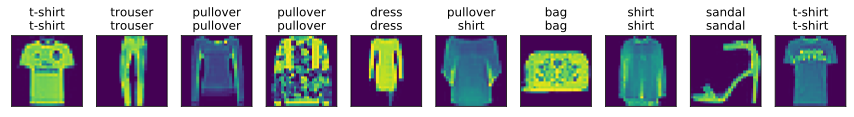

In [84]:
d2l.predict_ch3(net, test_iter, 10)

In [72]:
from d2l import show_images,get_fashion_mnist_labels
def show_output0(n,channel):
    for X,y in test_iter:
        break
    show_images(net[0](X[0:n])[:,channel,:,:].reshape(n, 28, 28), 1,n, titles=get_fashion_mnist_labels(y));
print(net[0](X[0:7])[:,0,:,:].shape)

(7, 28, 28)


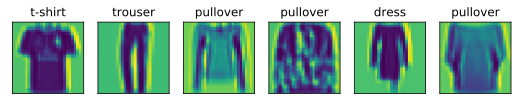

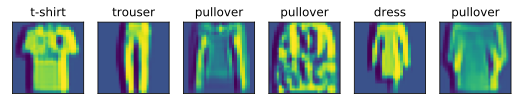

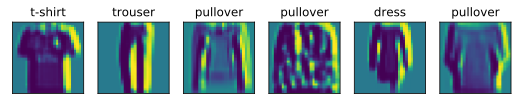

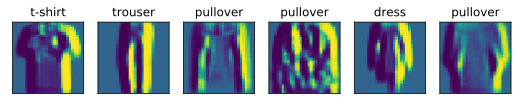

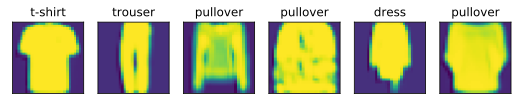

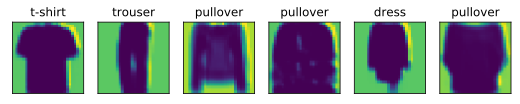

In [75]:
for i in range(6):
    show_output0(6,i)

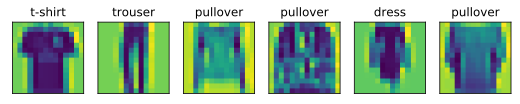

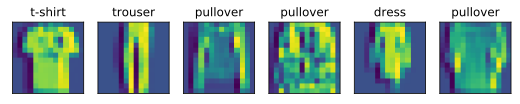

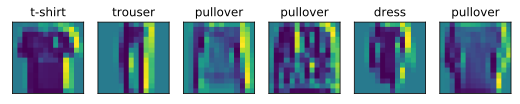

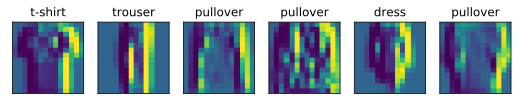

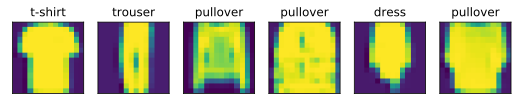

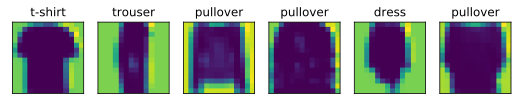

In [76]:
from d2l import show_images,get_fashion_mnist_labels
def show_output1(n,channel):
    for X,y in test_iter:
        break
    show_images(net[:2](X[0:n])[:,channel,:,:].reshape(n, 14, 14), 1,n, titles=get_fashion_mnist_labels(y));
for i in range(6):
    show_output1(6,i)

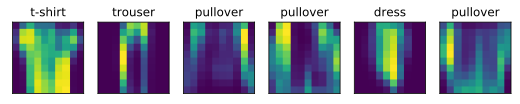

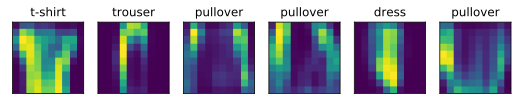

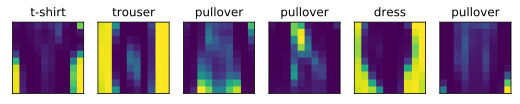

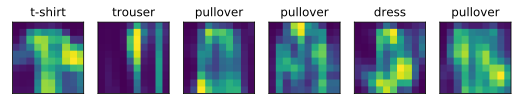

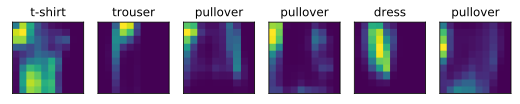

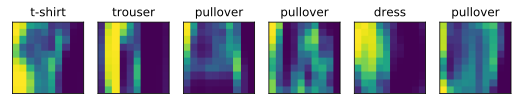

In [78]:
from d2l import show_images,get_fashion_mnist_labels
def show_output2(n,channel):
    for X,y in test_iter:
        break
    show_images(net[:3](X[0:n])[:,channel,:,:].reshape(n, 10, 10), 1,n, titles=get_fashion_mnist_labels(y));
for i in range(6):
    show_output2(6,i)